In [ ]:
import pandas as pd


Importando arquivos

In [ ]:
dados = pd.read_csv('tips.csv')

In [ ]:
dados.columns

In [ ]:
renomear = {
    'total_bill':'valor_da_conta',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia_da_semana',
    'time':'hora_do_dia',
    'size':'total_de_pessoas'}

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
#visualizacao
gorjetas.head()

In [ ]:
gorjetas.sobremesa.unique()

In [ ]:
sim_nao = {
    'No':'Não',
    'Yes':'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)


In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head()

In [ ]:
gorjetas.dia_da_semana.unique()

In [ ]:
dias = {
    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta',
    'Fri':'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)


In [ ]:
gorjetas.head()

In [ ]:
gorjetas.dia_da_semana.unique()

In [ ]:
hora = {
    'Dinner':'Jantar',
    'Lunch':'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)


In [ ]:
gorjetas.head()

Importando o Seaborn

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
!pip show seaborn

Valor da Conta e da Gorjeta

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=gorjetas)

In [ ]:
gorjetas.count()

Criando o Campo Porcentagem

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']

In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta',y='porcentagem',kind='line',data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

In [ ]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

In [ ]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

In [ ]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',col='sobremesa',data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta',y='gorjeta',col='sobremesa',hue='sobremesa',data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',kind='line',data=gorjetas)

Teste de Hipótese

A distribuição da taxa de gorjeta é a mesma nos dois grupos

A distribuição da taxa de gorjeta não é a mesma nos dois grupos

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [ ]:
r= ranksums(sobremesa,sem_sobremesa)

In [ ]:
print('O valor do p-value é {}/z'.format(r.pvalue))
print('Como o p-value ficou acima de 0,05, isso quer dizer que nao foi descartado a primeira hipotese')

In [ ]:
ranksums(sobremesa,sem_sobremesa)

Análise 3 - Dia Da Semana

In [ ]:
gorjetas.dia_da_semana.unique()

In [ ]:
sns.catplot(x='dia_da_semana',y='valor_da_conta',data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print(f'A Media geral das gorjetas é de {media_geral_gorjetas}')

In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

In [ ]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Teste de Hipótese

Hnull = A distribuição do valor da conta é igual no sábado e no domingo

Halt = A distribuição do valor da conta não é igual no sábado e no domingo

In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana=='Domingo'").valor_da_conta

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana=='Sábado'").valor_da_conta

In [ ]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

Análise 4 - Hora do Dia

In [ ]:
gorjetas.hora_do_dia.unique()

In [ ]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

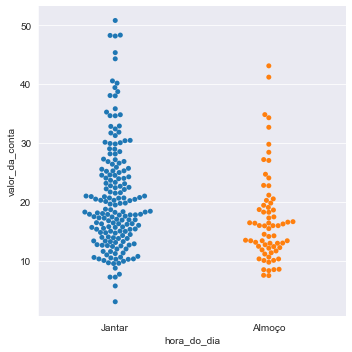

In [59]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',kind='swarm',data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

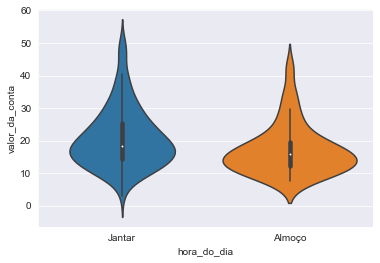

In [60]:
sns.violinplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

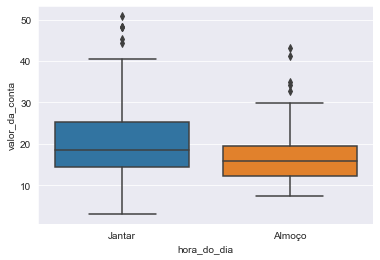

In [61]:
sns.boxplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

In [63]:
almoco = gorjetas.query("hora_do_dia=='Almoço' ").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

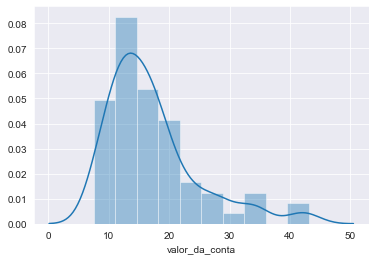

In [64]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

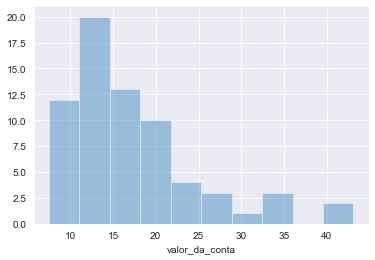

In [65]:
sns.distplot(almoco,kde=False)

In [66]:
jantar = gorjetas.query("hora_do_dia=='Jantar' ").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

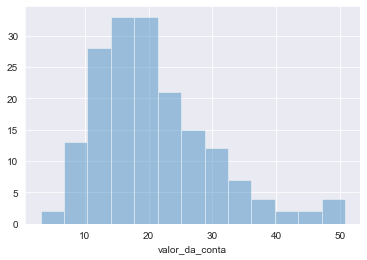

In [67]:
sns.distplot(jantar,kde=False)

In [69]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


Teste de Hipóteses

Ho = A distribuição da conta é igual no jantar e no almoço

Halt = A distribuição da conta não é igual no jantar e no almoço

In [72]:
r4 = ranksums(jantar,almoco)

In [74]:
print(f'O valor do p-value é de {r4.pvalue}, logo podemos aceitar a hipotese 2')

O valor do p-value é de 0.0011791039723641672, logo podemos aceitar a hipotese 2


In [82]:
porcentagem_almoco = gorjetas.query("hora_do_dia=='Almoço' ").porcentagem

In [80]:
porcentagem_jantar = gorjetas.query("hora_do_dia=='Jantar' ").porcentagem

Teste de Hipóteses 2

Ho = A distribuição da taxa da gorjeta é igual no jantar e no almoço

Halt = A distribuição da taxa da gorjeta é igual no jantar e no almoço

In [85]:
r5 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [86]:
print(f'O valor do p-value é de {r5.pvalue}, logo podemos aceitar a hipotese 1')

O valor do p-value é de 0.2602493995587126, logo podemos aceitar a hipotese 1
